<a href="https://colab.research.google.com/github/JMML2021/Analisis-Compa-ia-Aerea-Espa-ola/blob/main/Calculo%20Vueling%202022%20con%20codigos%20Rev%20G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


# Cargar fichero de # Abrimos los ficheros 

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'

In [90]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2022.06.03 2022_delay + cierre puertas.xlsx'

In [91]:
# Abrir fichero de Github.
#path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'
Hoja = 'FLT_2022'

df = pd.read_excel(path, sheet_name=Hoja)


In [92]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['DATE                             ', 'FLT    ', 'REG   ', 'AC ', 'DEP',
       'ARR', 'STD  ', 'STA  ', 'TKof ',
       'TDwn                                                      ', 'ATD  ',
       'ATA  ', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX  ', 'LF ',
       'Taxi-out', 'Taxi-In', 'SLOT       ', 'C1', 'DLY1 ', 'Sub1', 'C2',
       'DLY2 ', 'Sub2', 'C3', 'DLY3 ', 'Sub3', 'C4', 'DLY4 ', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2'],
      dtype='object')

In [93]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'FLT', 'REG', 'AC', 'DEP',
       'ARR', 'STD', 'STA', 'TKof', 'TDwn', 'ATD',
       'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2',
       'DLY2', 'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2']

In [94]:
df['Close Pax Door']

0        2022-01-01 07:58:00.000
1        2022-01-01 09:48:00.000
2        2022-01-01 11:38:00.000
3        2022-01-01 13:18:00.000
4        2022-01-01 15:07:00.000
                  ...           
60487    2022-05-23 00:00:00.000
60488    2022-05-23 00:00:00.000
60489    2022-05-23 00:00:00.000
60490    2022-05-23 00:00:00.000
60491    2022-05-23 00:00:00.000
Name: Close Pax Door, Length: 60492, dtype: object

In [95]:
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

0 DATE                              * DATE -
1 FLT     * FLT -
2 REG    * REG -
3 AC  * AC -
4 DEP * DEP -
5 ARR * ARR -
6 STD   * STD -
7 STA   * STA -
8 TKof  * TKof -
9 TDwn                                                       * TDwn -
10 ATD   * ATD -
11 ATA   * ATA -
12 BLOCK * BLOCK -
13 FLThr * FLThr -
14 DStand * DStand -
15 AStand * AStand -
16 ACT PAX   * ACT PAX -
17 LF  * LF -
18 Taxi-out * Taxi-out -
19 Taxi-In * Taxi-In -
20 SLOT        * SLOT -
21 C1 * C1 -
22 DLY1  * DLY1 -
23 Sub1 * Sub1 -
24 C2 * C2 -
25 DLY2  * DLY2 -
26 Sub2 * Sub2 -
27 C3 * C3 -
28 DLY3  * DLY3 -
29 Sub3 * Sub3 -
30 C4 * C4 -
31 DLY4  * DLY4 -
32 Sub4 * Sub4 -
33 C1Arr * C1Arr -
34 DLY1Arr * DLY1Arr -
35 Close Pax Door * Close Pax Door -
36 Close Cargo Door * Close Cargo Door -
37 Open Cargo/Pax Door * Open Cargo/Pax Door -
38 close pax door2 * close pax door2 -
39 close cargo door2 * close cargo door2 -
40 open cargo/pax door2 * open cargo/pax door2 -


In [96]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

   Secuencia       STD  DEP
0        1.0  07:40:00  BIO
1        2.0  09:40:00  SVQ
2        3.0  11:40:00  BIO
3        4.0  13:30:00  SCQ


In [97]:
# Identifico los Aeropuertos principales.

path =(r"/content/drive/MyDrive/Flights Movement 2019-2022 MAR.xlsx")
 
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head

In [98]:
df

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,07:40:00,09:05:00,08:10:00,09:17:00,...,,8,00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,07:58,07:31,09:23,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,09:40:00,11:05:00,10:03:00,11:07:00,...,,8,00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,09:48,09:46,11:11,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,11:40:00,12:50:00,11:50:00,12:40:00,...,,,NaN,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,11:38,11:34,12:46,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,13:30:00,14:35:00,13:30:00,14:08:00,...,,,NaN,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,13:18,13:06,14:12,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,15:15:00,18:20:00,15:23:00,18:07:00,...,,,NaN,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,15:07,15:01,18:14,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60487,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-05-23 00:00:00.000,2022-05-23 00:00:00.000,NaN,00:00,00:00,NaN,NaN
60488,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-05-23 00:00:00.000,2022-05-23 00:00:00.000,NaN,00:00,00:00,NaN,NaN
60489,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-05-23 00:00:00.000,2022-05-23 00:00:00.000,NaN,00:00,00:00,NaN,NaN
60490,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-05-23 00:00:00.000,2022-05-23 00:00:00.000,NaN,00:00,00:00,NaN,NaN


In [99]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia'],
      dtype='object')

In [100]:
# Convierto todas las columnas de tiempo en un formato correcto

formato = "%H:%M:%S"


def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')

'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     'DLY1Arr','close pax door2', 'close cargo door2', 'open cargo/pax door2',
                     'SLOT', 'DLY1', 'DLY2']
'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     
               ]

for x in columnasConvertir:
    convertirTiempo(x)


In [101]:
#Subrutina que suma las fechas con las horas.

def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [102]:
df['STD']

0       1900-01-01 07:40:00
1       1900-01-01 09:40:00
2       1900-01-01 11:40:00
3       1900-01-01 13:30:00
4       1900-01-01 15:15:00
                ...        
60487                   NaT
60488                   NaT
60489                   NaT
60490                   NaT
60491                   NaT
Name: STD, Length: 60492, dtype: datetime64[ns]

In [103]:
df1=df.copy()
print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr',
                  'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


0   1900-01-01 07:40:00
1   1900-01-01 09:40:00
2   1900-01-01 11:40:00
3   1900-01-01 13:30:00
4   1900-01-01 15:15:00
Name: STD, dtype: datetime64[ns]
.....Clave:  Date_STD .... DATE STD
.....Clave:  Date_STA .... DATE STA
.....Clave:  Date_TKof .... DATE TKof
.....Clave:  Date_TDwn .... DATE TDwn
.....Clave:  Date_ATD .... DATE ATD
.....Clave:  Date_ATA .... DATE ATA
.....Clave:  Date_BLOCK .... DATE BLOCK
.....Clave:  Date_FLThr .... DATE FLThr
.....Clave:  Date_close pax door2 .... DATE close pax door2
.....Clave:  Date_close cargo door2 .... DATE close cargo door2


In [104]:
#Añado eL mes

df['MES'] = df['STD'].dt.month

# Convierto todas las columnas de tiempo en un formato correcto

# Identificacion de los principales Aeropuertos

In [105]:
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia,MES,Aeropuerto_Key,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,2022-01-01 07:58:00,2022-01-01 07:31:00,09:23,1.0,1.0,BIO,SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,2022-01-01 09:48:00,2022-01-01 09:46:00,11:11,2.0,1.0,SVQ,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,2022-01-01 11:38:00,2022-01-01 11:34:00,12:46,3.0,1.0,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,2022-01-01 13:18:00,2022-01-01 13:06:00,14:12,4.0,1.0,SCQ,BIO


# Calculo tiempo en vuelo 1

In [106]:
df.columns
#print(df['Close Pax Door'])

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1'],
      dtype='object')

In [107]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [108]:
df['Close Pax Door']

0        2022-01-01 07:58:00.000
1        2022-01-01 09:48:00.000
2        2022-01-01 11:38:00.000
3        2022-01-01 13:18:00.000
4        2022-01-01 15:07:00.000
                  ...           
56128    2022-05-16 13:44:00.000
56129    2022-05-16 16:19:00.000
56130    2022-05-16 18:41:00.000
56131    2022-05-16 06:30:00.000
56132    2022-05-16 10:12:00.000
Name: Close Pax Door, Length: 56133, dtype: object

In [109]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   1900-01-01 08:00:00
1   1900-01-01 09:51:00
2   1900-01-01 11:40:00
3   1900-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [110]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0         -2.0
1         -3.0
2         -2.0
3         -5.0
4          0.0
         ...  
56128    417.0
56129    474.0
56130    479.0
56131   -440.0
56132   -406.0
Name: t_ClosePax, Length: 56133, dtype: float64

In [111]:
#df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
#df['Retardo_Abrir_Puerta_Pax']

In [112]:
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['Open Cargo/Pax Door'] =pd.to_datetime(df['Open Cargo/Pax Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 

#
#df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas', 'Open Cargo/Pax Door']]##.head(4)




In [113]:
df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
df[['Retardo_Abrir_Puerta_Pax', 'Open Cargo/Pax Door','ATA']]

,Retardo_Abrir_Puerta_Pax,Open Cargo/Pax Door,ATA
0,0 days 00:03:00,2022-01-01 09:23:00,2022-01-01 09:20:00
1,0 days 00:02:00,2022-01-01 11:11:00,2022-01-01 11:09:00
2,0 days 00:01:00,2022-01-01 12:46:00,2022-01-01 12:45:00
3,0 days 00:01:00,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0 days 00:00:00,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
56128,0 days 07:56:00,2022-05-16 15:33:00,2022-05-16 07:37:00
56129,0 days 07:59:00,2022-05-16 18:01:00,2022-05-16 10:02:00
56130,0 days 08:36:00,2022-05-16 20:31:00,2022-05-16 11:55:00
56131,-1 days +17:16:00,2022-05-16 09:34:00,2022-05-16 16:18:00


In [114]:
df['t_Close_Cargo_Door']

0        -29.0
1         -5.0
2         -6.0
3        -17.0
4         -6.0
         ...  
56128    414.0
56129    473.0
56130    478.0
56131   -441.0
56132   -408.0
Name: t_Close_Cargo_Door, Length: 56133, dtype: float64

In [115]:
# Estudio los trayectos.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [116]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()


df1=df
df1.head(2)



,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key,AeropuertoKey1,DuracionVueloTeorico,DuracionVueloReal,E_Duracion_Vuelo,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Retardo_Abrir_Puerta_Pax,Trayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SVQ,85.0,80.0,-5.0,-2.0,-29.0,-27.0,0 days 00:03:00,BIO-SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,SVQ,BIO,85.0,78.0,-7.0,-3.0,-5.0,-2.0,0 days 00:02:00,BIO-SVQ


In [117]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


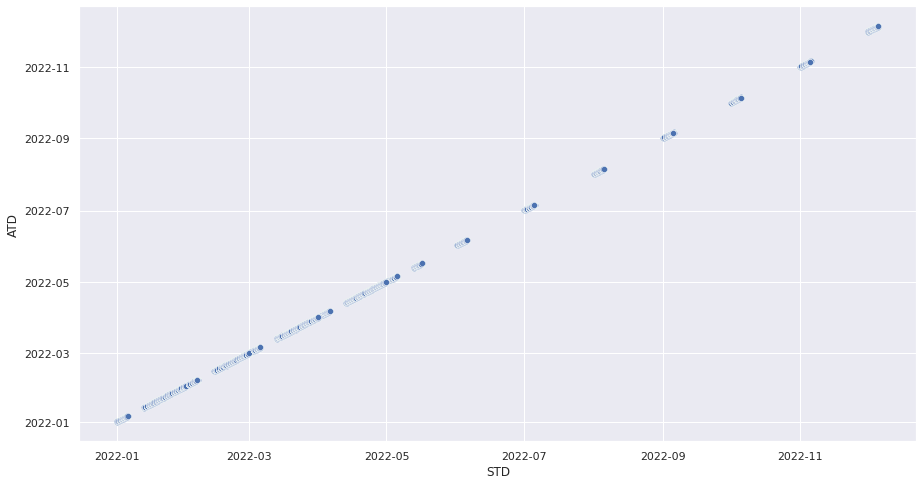

In [118]:
ax = sns.scatterplot( df1['STD'], df1['ATD'])

# Calculo error del primer despegue.

In [119]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [120]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [121]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['DATE','REG', 'Secuencia','STD', 'ATD']][0:8])

print('Media = ', df1['E_Despegue'].mean())

         DATE     REG  Secuencia                 STD                 ATD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00 2022-01-01 17:31:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00 2022-01-01 05:20:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00 2022-01-01 07:29:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00 2022-01-01 12:01:00
Media =  1.040119717808024


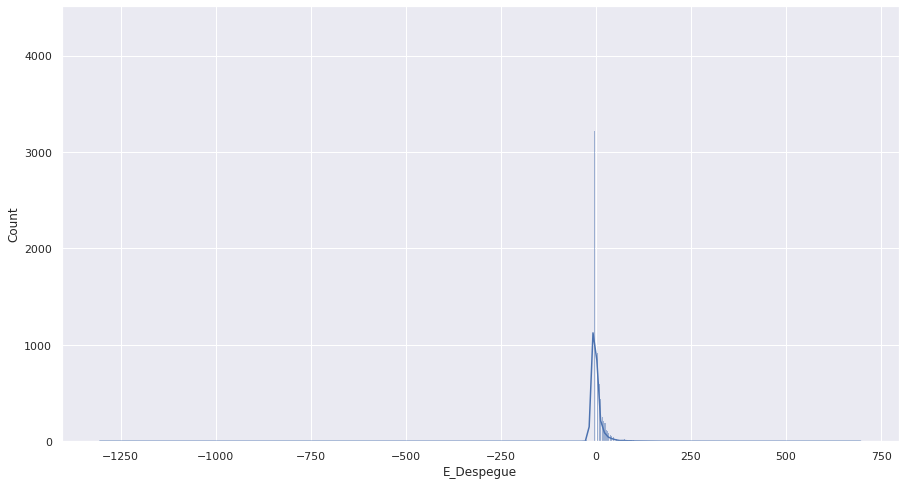

In [122]:
sns.histplot(data= df1.E_Despegue, kde= True)

# Vemos que hay mucha dispersion hay que filtrar los datos a:
## error de salida > 30 y < 30 y es el primer despegue

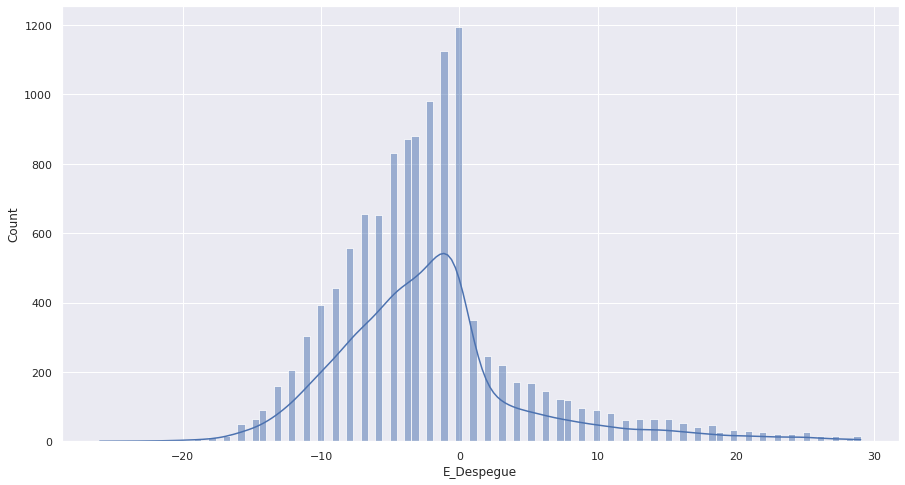

In [123]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
sns.histplot(data= df2.E_Despegue, kde= True)
print()
#print('Media filtrada = ', round(df1['E_Despegue'].mean(),2), 'minutos')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 

In [124]:
# Para saber la puntualidad solo de Barcelona
df2barcelonaPuntualida = (df2['DEP']== 'BCN')


df2BarcelonaPuntualida = df2[df2barcelonaPuntualida]
df2barcelonaPuntualida.head()

#df2BarcelonaPuntualida.head()
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)#
#print(df2BarcelonaPuntualida[[ 'DATE',   'FLT',     'REG',  'AC', 'DEP',  'ARR']] )

Text(0.5, 1.0, 'Puntualidad principales aeropuertos:')

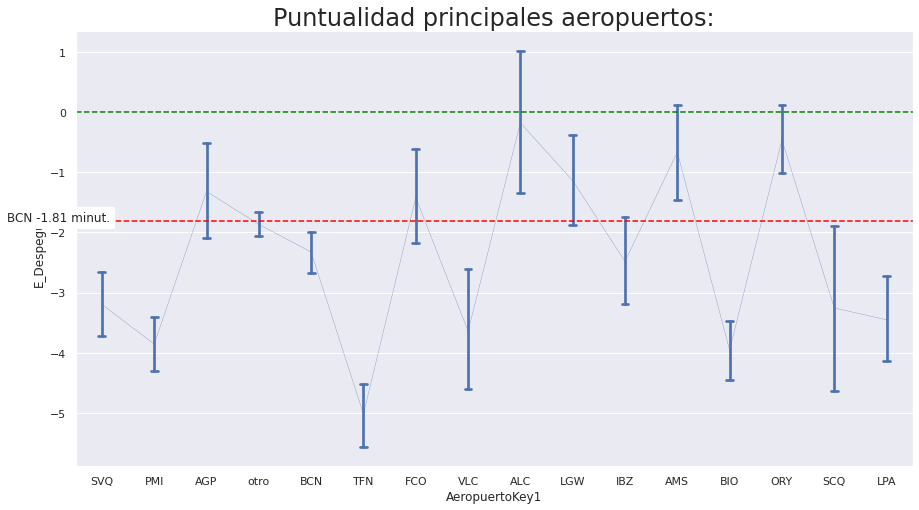

In [125]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos:', fontsize = 24)

# tiempo 'Close Cargo Door'  -   'Close Pax'


Media filtrada =  -63899.17 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


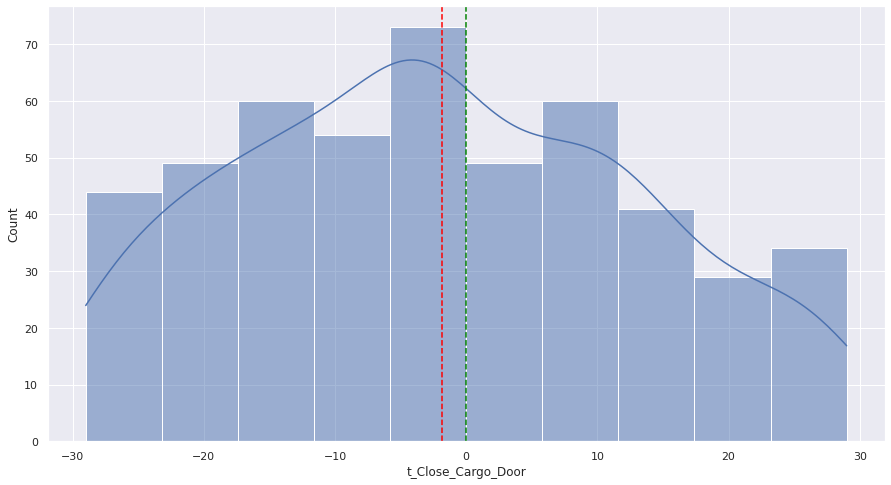

In [126]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 30) & (df1['t_Close_Cargo_Door']> -30))

df2 = df2[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -63896.34 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


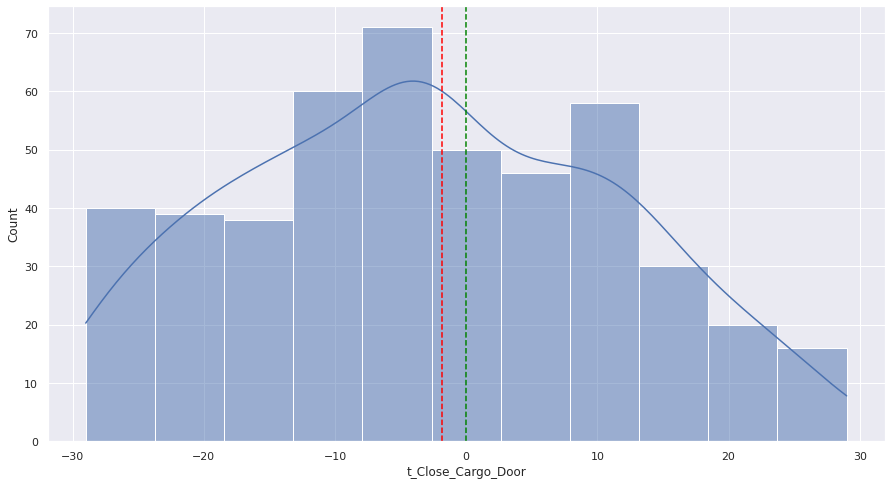

In [127]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


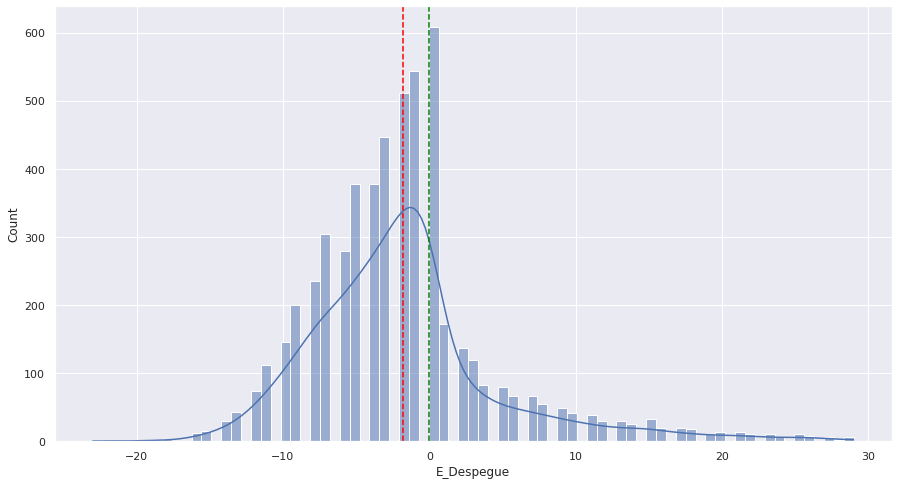

In [128]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [129]:
#Creamos los LAGs

df= df.sort_values(['DATE', 'REG', 'STD'])


df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 

#adecuarFechas('Pasajeros', 'ACT PAX  ')
df[f'lag_ACT PAX']= df['ACT PAX'].shift(periods=-1) 

#Lag de la siguiente secuencia
df[f'lag_Secuencia']= df['Secuencia'].shift(periods=-1) 
df[f'lag_REG']= df['REG'].shift(periods=-1) 

df[['lag_Secuencia', 'lag_REG']]

,lag_Secuencia,lag_REG
0,2.0,EC-JSY
1,3.0,EC-JSY
2,4.0,EC-JSY
3,5.0,EC-JSY
4,6.0,EC-JSY
...,...,...
56128,3.0,EC-NLY
56129,4.0,EC-NLY
56130,5.0,EC-NLY
56131,6.0,EC-NLY


# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

In [130]:
df= df.sort_values(['DATE', 'REG', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')

df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']


#df[f'lag_STD']= df['STD'].shift(periods=-1)  


df3=df
#selecionoSecuencia_1= (df['Secuencia']== 1)
#df3 = df[selecionoSecuencia_1]


#print(df3[['DATE','REG', 'Secuencia']][0:8])

print(df3[['FLT', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


    FLT  Secuencia                 STD                 ATD  \
0  2506        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  2505        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  1386        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  1387        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  5.51 minutos


In [131]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

0    15.0
1     4.0
2    -5.0
Name: Puntualidad1, dtype: float64

# Calculo Tiempo de carga y descarga de pasajeros:
Cojo solo las segundas secuencias que tengan el siguiente vuelo el mismo REG

In [132]:
# Total pasajeros Boarding

df['Total_PAX_Boarding'] = df['lag_ACT PAX'] +df['ACT PAX']

df['Total_PAX_Boarding'] 

df['T_Medio_Boarding'] = round(df['Total_PAX_Boarding'] / df['T_RealTierra1'],1)
df[['T_Medio_Boarding', 'Total_PAX_Boarding', 'T_RealTierra1']]
#df['T_Medio_Boarding']

,T_Medio_Boarding,Total_PAX_Boarding,T_RealTierra1
0,6.6,206.0,31.0
1,4.4,135.0,31.0
2,2.1,78.0,38.0
3,3.6,202.0,56.0
4,7.5,276.0,37.0
...,...,...,...
56128,8.5,407.0,48.0
56129,9.2,367.0,40.0
56130,2.9,329.0,115.0
56131,8.6,345.0,40.0


In [133]:
# Calculo de los tiempos de Taxi

df['Taxi_Despegue'] = (df['TKof']-df['ATD']) /  np.timedelta64(1, 'm')
df['Taxi_Aterrizaje'] = (df['ATA']- df['TDwn']) /  np.timedelta64(1, 'm')
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
56128,10.0,4.0
56129,24.0,5.0
56130,7.0,4.0
56131,24.0,7.0


# Tiempo de rodadura (En el despegue y en el aterrizaje

# Creamos los LAG siguientes saltos

In [134]:
#df.columns

In [164]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 
df[f'E_Despegue4']= df['E_Despegue'].shift(periods=-3) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 
df[f'E_Duracion_Vuelo4']= df['E_Duracion_Vuelo'].shift(periods=-3) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 
df[f'E_tierra4']= df['E_tierra1'].shift(periods=-3) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 
df[f'Aeropuerto_Key4']= df['Aeropuerto_Key'].shift(periods=-3) 

df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 
df[f'Puntualidad4']= df['Puntualidad1'].shift(periods=-3) 

df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3'] + df[f'E_Despegue4']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']   + df[f'E_Duracion_Vuelo4'] 
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    + df[f'E_tierra4']

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

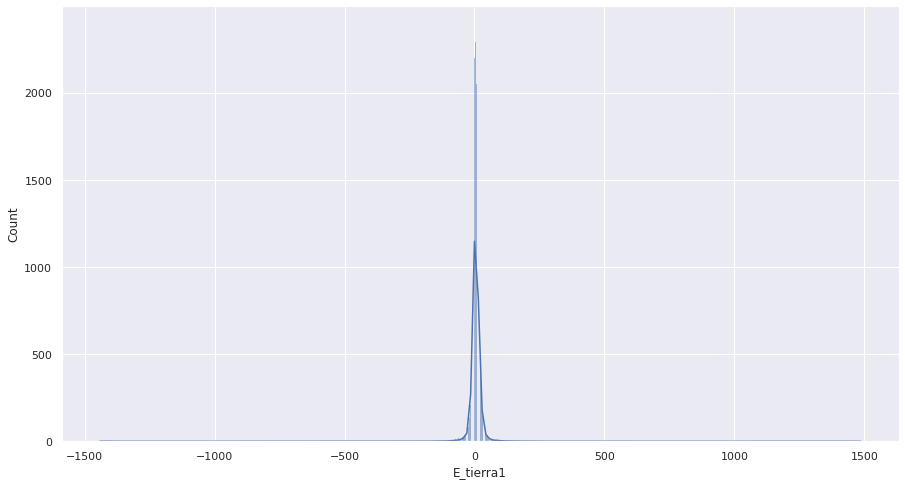

In [136]:
sns.histplot(data= df3.E_tierra1, kde= True)


Media filtrada =  4.63 minutos


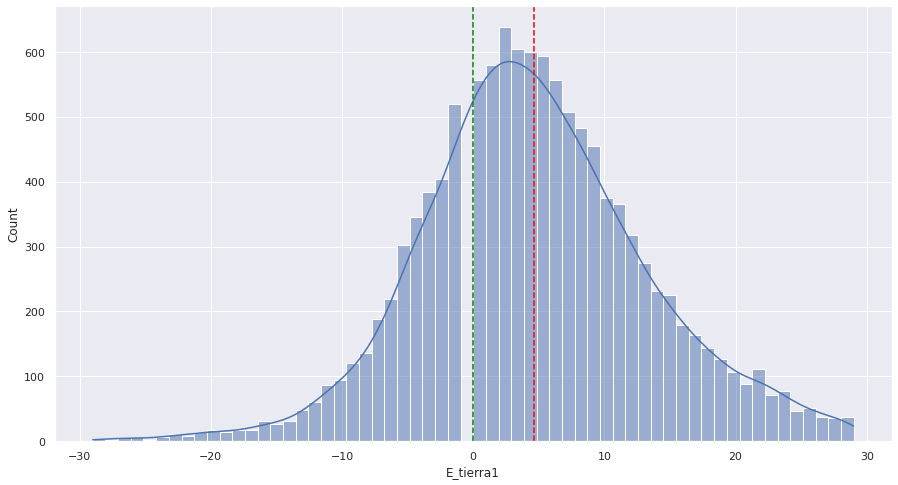

In [166]:
# Eliminar los outliers
#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')

In [138]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,T_teoricoTierra1,t_boarding
0,35.0,1.- <40
6,40.0,2.- 40
12,40.0,2.- 40
16,35.0,1.- <40
21,55.0,5.- 55


In [139]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['ARR']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('Error en el aterrizaje de Barcelona ', df4BarcelonaTierraError)

Error en el aterrizaje de Barcelona  3.24


Text(0.5, 1.0, 'Error primer t. BOARDING principales aeropuertos:')

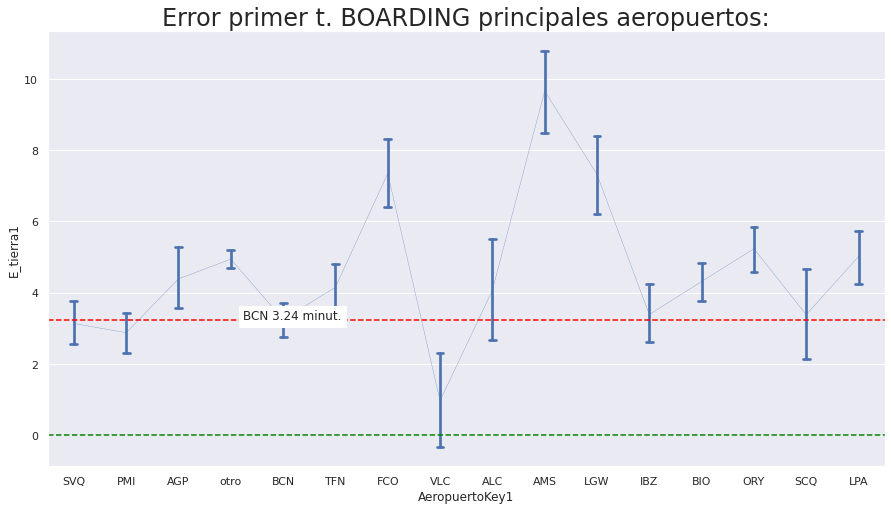

In [140]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

In [141]:
df4BarcelonaTierra .head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,E_tierra3,Aeropuerto_Key2,Aeropuerto_Key3,Puntualidad2,Puntualidad3,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,1.0,BCN,otro,-9.0,-6.0,-18.0,4.0,-5.0,-19.0,5.- 55
42,2022-01-01,2114,EC-LLM,320,AGP,BCN,2022-01-01 07:40:00,2022-01-01 09:15:00,2022-01-01 07:55:00,2022-01-01 09:09:00,...,10.0,BCN,SVQ,-11.0,-21.0,-9.0,-26.0,15.0,-20.0,3.- 45
237,2022-01-01,8031,EC-MMH,321,ORY,BCN,2022-01-01 08:35:00,2022-01-01 10:15:00,2022-01-01 09:02:00,2022-01-01 10:15:00,...,3.0,BCN,otro,-6.0,-11.0,18.0,-31.0,5.0,-8.0,2.- 40
246,2022-01-01,2110,EC-MNZ,32A,AGP,BCN,2022-01-01 05:50:00,2022-01-01 07:25:00,2022-01-01 05:52:00,2022-01-01 07:00:00,...,8.0,BCN,otro,-25.0,0.0,-15.0,-31.0,48.0,2.0,7.- >60
290,2022-01-01,1429,EC-MXG,32A,BIO,BCN,2022-01-01 13:50:00,2022-01-01 15:00:00,2022-01-01 13:55:00,2022-01-01 14:41:00,...,-2.0,BCN,IBZ,-3.0,-6.0,-17.0,-6.0,4.0,-19.0,4.- 50


In [142]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

2.- 40       3373
1.- <40      3249
3.- 45       3012
4.- 50        833
7.- >60       706
NEGATIVOS     367
5.- 55        128
6.- 60        101
Name: t_boarding, dtype: int64

Text(0.5, 1.0, 'Error boarding BCN:')

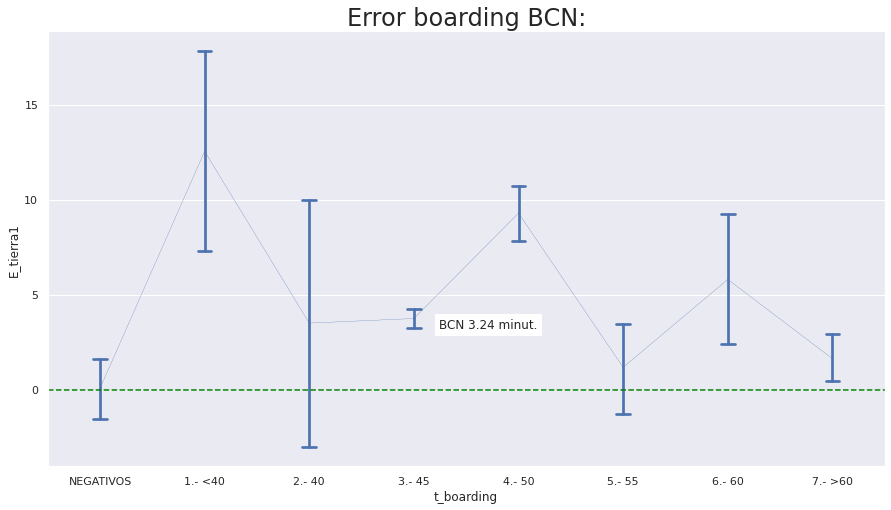

In [143]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [144]:
# Borro las columnas que no me interesan.

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [167]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [171]:
# Guardar excel
nombreFichero = "D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_JMML_" + Hoja + ".xlsx"

df3.to_excel(nombreFichero)
print()
print('Guardado fichero : ', nombreFichero)
print()


Guardado fichero :  D:\Documentos D.- Datos Vueling\Vueling_Python_MAR_JMML_FLT_2022.xlsx



In [176]:
# Pruebo esta manera de guardar el fichero EXCEL

from pandas import ExcelWriter

nombreFichero = "D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_JMML_" + Hoja + ".xlsx"

writer = ExcelWriter(nombreFichero)
df3.to_excel(writer, 'Hoja de datos', index=False)
writer.save()
print()
print('Guardado fichero : ', nombreFichero)
print()

In [179]:
print('forma ',df3.shape)
df3

forma  (11769, 84)


,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,E_tierra3,Aeropuerto_Key2,Aeropuerto_Key3,Puntualidad2,Puntualidad3,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,retardoOperturaPuertaAterrizaje
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,-2.0,SVQ,BIO,4.0,-5.0,31.0,-17.0,-10.0,4.0,3.0
6,2022-01-01,3961,EC-JZI,320,SVQ,PMI,2022-01-01 07:30:00,2022-01-01 09:00:00,2022-01-01 07:21:00,2022-01-01 08:34:00,...,-6.0,PMI,SVQ,-21.0,-5.0,-46.0,-2.0,9.0,-39.0,-2.0
12,2022-01-01,2117,EC-KDG,320,BCN,AGP,2022-01-01 14:20:00,2022-01-01 15:55:00,2022-01-01 14:40:00,2022-01-01 15:53:00,...,1.0,AGP,BCN,6.0,-10.0,11.0,-12.0,-4.0,-5.0,1.0
16,2022-01-01,3280,EC-KDH,320,BIO,ACE,2022-01-01 07:50:00,2022-01-01 10:40:00,2022-01-01 08:21:00,2022-01-01 10:55:00,...,21.0,otro,BIO,-3.0,-22.0,29.0,-35.0,11.0,5.0,1.0
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,1.0,BCN,otro,-9.0,-6.0,-18.0,4.0,-5.0,-19.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56105,2022-05-16,3001,EC-NIJ,32A,LPA,BCN,2022-05-16 06:00:00,2022-05-16 09:15:00,2022-05-16 06:02:00,2022-05-16 08:54:00,...,13.0,BCN,LPA,-6.0,-18.0,-21.0,-20.0,26.0,-15.0,760.0
56108,2022-05-16,2110,EC-NIY,32A,AGP,BCN,2022-05-16 04:45:00,2022-05-16 06:25:00,2022-05-16 04:59:00,2022-05-16 06:12:00,...,0.0,BCN,AGP,-23.0,5.0,-12.0,-16.0,26.0,-2.0,274.0
56115,2022-05-16,3004,EC-NLV,321,BCN,LPA,2022-05-16 04:50:00,2022-05-16 08:20:00,2022-05-16 05:12:00,2022-05-16 08:13:00,...,7.0,LPA,BCN,3.0,-8.0,-2.0,-7.0,6.0,-3.0,261.0
56121,2022-05-16,8980,EC-NLX,321,BCN,BRU,2022-05-16 04:45:00,2022-05-16 06:55:00,2022-05-16 05:13:00,2022-05-16 06:56:00,...,11.0,otro,BCN,7.0,-10.0,15.0,-11.0,7.0,11.0,386.0


# Estudio de la duracion del vuelo

In [148]:
# Identifico los Aeropuertos principales.


path =(r"/content/drive/MyDrive/Vueling_Trayectos_Duracion_Vuelo.xlsx")
 
#df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')

#path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")


df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(3)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY


In [149]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [150]:
# Solo escojo los datos que necesito para le calculo volando
'''
df.columns
df5 = df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',
                  'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)
'''

"\ndf.columns\ndf5 = df\nborrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',\n                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',\n                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',\n                  'T_RealTierra1', 't_Entre_Puertas']\n\ndf5 = df5.drop(borrarColumnas, axis=1)\ndf5.head(1)\n"

In [151]:
# Agrupo por Trayecto

df5 = df

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['DATE', 'REG', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,E_tierra3,Aeropuerto_Key2,Aeropuerto_Key3,Puntualidad2,Puntualidad3,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,grupoTrayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,-2.0,SVQ,BIO,4.0,-5.0,31.0,-17.0,-10.0,4.0,otro
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,16.0,BIO,SCQ,-5.0,-24.0,4.0,-29.0,10.0,-15.0,otro
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,2.0,SCQ,BIO,-24.0,-6.0,-15.0,-20.0,16.0,-19.0,otro


In [152]:
#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

dfRegistros1= (df5['Secuencia']== 1) 

df5 = df5[dfRegistros1]

path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
#df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

df5.to_excel(path)
print()
print('Guardado fichero :' , path)
print()


Guardado fichero : /content/drive/MyDrive/Ficheros de Vueling/2022-07-05 16:33:21.527205 FLT_2022.xlsx



/content/drive/MyDrive/Ficheros de Vueling

# Estudio de los tiempos de TAXI


In [153]:
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
56128,10.0,4.0
56129,24.0,5.0
56130,7.0,4.0
56131,24.0,7.0



Media =  13.85 minutos


Text(0.5, 1.0, 'Tiempo de Radadura Takeoff')

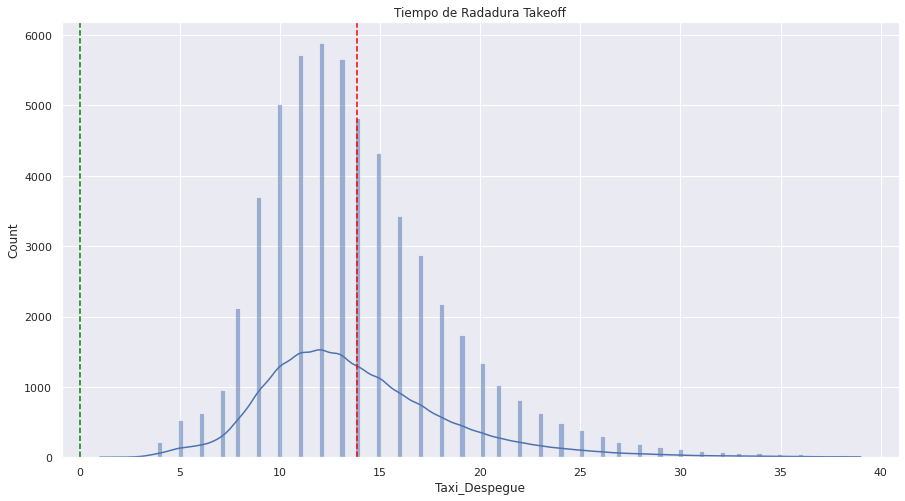

In [154]:
# Taxi Despegue:
dfEliminarOutliers= ((df['Taxi_Despegue'] <40) & (df['Taxi_Despegue'] >0))

df3 = df[dfEliminarOutliers]

ax = sns.histplot(data= df3.Taxi_Despegue, kde= True)
print()
print('Media = ', round(df3['Taxi_Despegue'].mean(),2), 'minutos')

media = round(df3['Taxi_Despegue'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de Radadura Takeoff')


Media =  5.5 minutos


Text(0.5, 1.0, 'Tiempo de rodadura Landing')

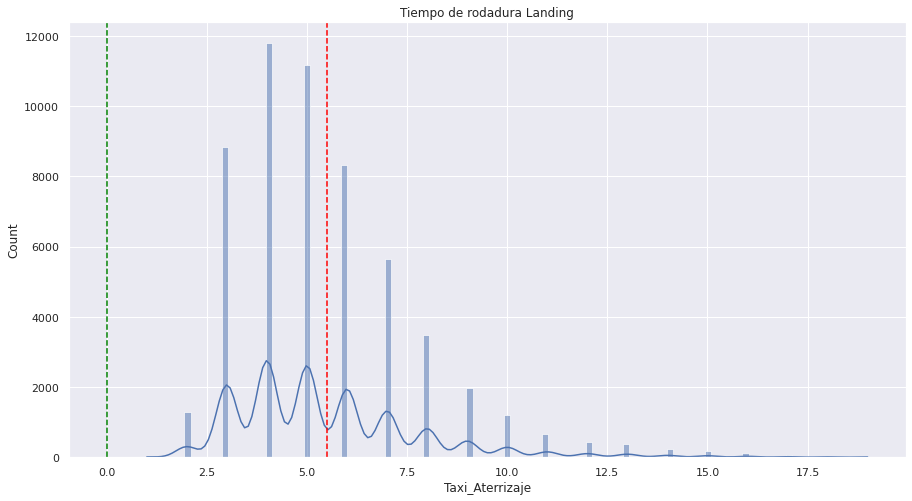

In [155]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df['Taxi_Aterrizaje'] <20) & (df['Taxi_Aterrizaje'] >0))

df3 = df[dfEliminarOutliers] 

ax = sns.histplot(data= df3.Taxi_Aterrizaje, kde= True)
print()
print('Media = ', round(df3['Taxi_Aterrizaje'].mean(),2), 'minutos')

media = round(df3['Taxi_Aterrizaje'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de rodadura Landing')

# Cantidad de tiempo que tardamos en vaciar y llenar un avion.

In [156]:
# Estudio la cantidad de tiempo que tardamos en vaciar y llenar un avion.

dfEliminarOutliers= ((df['REG'] == df['lag_REG']))

df3 = df[dfEliminarOutliers] 
df3['Total_Pasajeros_Boarding']= df3['ACT PAX'] +df3['lag_ACT PAX']

df3['t_Boarding_X_Pasajero'] = round((df3['Total_Pasajeros_Boarding']/ df3['T_RealTierra1']),2)

df3[4:10][['REG', 
           'lag_REG',
           'Total_Pasajeros_Boarding', 
           'ACT PAX', 'lag_ACT PAX',
           't_Boarding_X_Pasajero', 
           'T_Medio_Boarding']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,REG,lag_REG,Total_Pasajeros_Boarding,ACT PAX,lag_ACT PAX,t_Boarding_X_Pasajero,T_Medio_Boarding
4,EC-JSY,EC-JSY,276.0,155.0,121.0,7.46,7.5
6,EC-JZI,EC-JZI,175.0,57.0,118.0,3.89,3.9
7,EC-JZI,EC-JZI,241.0,118.0,123.0,5.36,5.4
8,EC-JZI,EC-JZI,123.0,123.0,0.0,4.24,4.2
9,EC-JZI,EC-JZI,125.0,0.0,125.0,3.05,3.0
10,EC-JZI,EC-JZI,219.0,125.0,94.0,6.44,6.4



Media =  5.56 minutos


Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto')

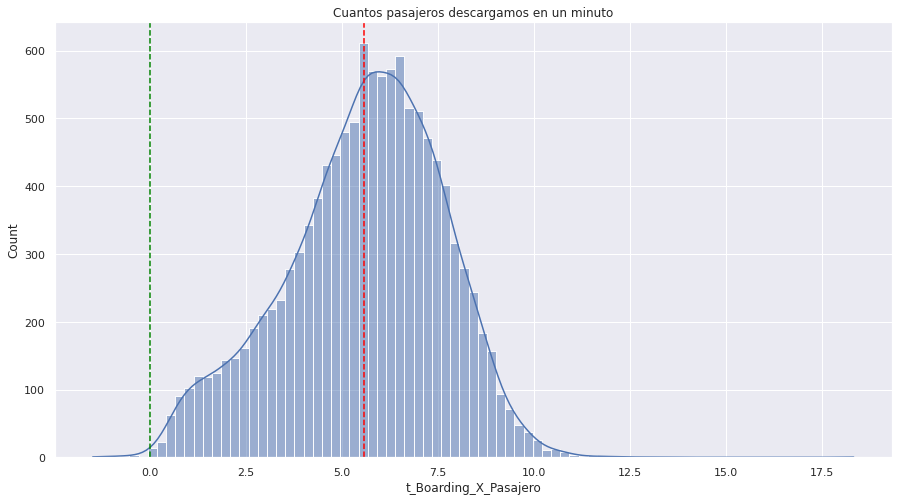

In [157]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df3['t_Boarding_X_Pasajero'] <20) & 
                     (df3['t_Boarding_X_Pasajero'] >-10) & 
                     (df3['Secuencia'] ==1))

df3 = df3[dfEliminarOutliers] 
variableHistograma = 't_Boarding_X_Pasajero'
ax = sns.histplot(data= df3.t_Boarding_X_Pasajero, kde= True)
print()
print('Media = ', round(df3[variableHistograma].mean(),2), 'minutos')

media = round(df3[variableHistograma].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Cuantos pasajeros descargamos en un minuto')

Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto por Aeropuerto:')

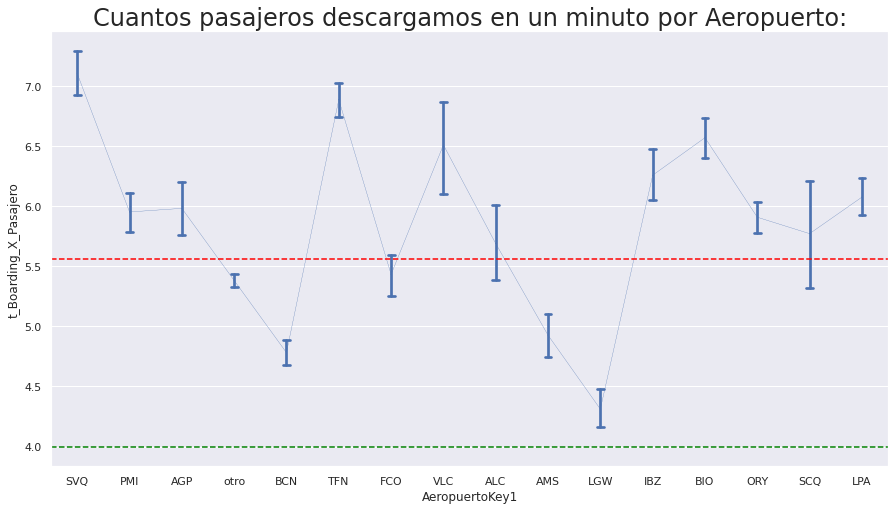

In [158]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
 
sns.set(rc = {'figure.figsize':(15,8)})  

# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = 't_Boarding_X_Pasajero', data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(4, color="green", linestyle = '--')


#textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
#ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Cuantos pasajeros descargamos en un minuto por Aeropuerto:', fontsize = 24)

In [159]:
df3['Secuencia']

0        1.0
6        1.0
12       1.0
16       1.0
21       1.0
        ... 
56105    1.0
56108    1.0
56115    1.0
56121    1.0
56127    1.0
Name: Secuencia, Length: 11870, dtype: float64

# Estudio del SLOT

In [160]:
# Calculo el tiempo que hay de diferente entre SLOT v STD
df3= df.copy()
dfEliminarOutliers= ((df3['E_Despegue'] >20) &(df3['DEP'] =='BCN'))

df3 = df3[dfEliminarOutliers] 


#df3['E_SLOT']= df3['SLOT']-df3['STD']
df3[[ 'SLOT', 'STD', 'ATD', 'E_Despegue', 'DEP']]

,SLOT,STD,ATD,E_Despegue,DEP
91,,2022-01-01 19:05:00,2022-01-01 20:33:00,88.0,BCN
94,,2022-01-01 15:25:00,2022-01-01 15:47:00,22.0,BCN
106,,2022-01-01 17:30:00,2022-01-01 19:48:00,138.0,BCN
178,06:46:00,2022-01-01 06:00:00,2022-01-01 06:31:00,31.0,BCN
219,,2022-01-01 17:55:00,2022-01-01 18:23:00,28.0,BCN
...,...,...,...,...,...
55720,,2022-05-16 18:30:00,2022-05-16 18:59:00,29.0,BCN
55722,,2022-05-16 05:10:00,2022-05-16 05:42:00,32.0,BCN
55850,16:50:00,2022-05-16 16:00:00,2022-05-16 16:39:00,39.0,BCN
56073,09:22:00,2022-05-16 08:05:00,2022-05-16 09:13:00,68.0,BCN


# Estudio LF

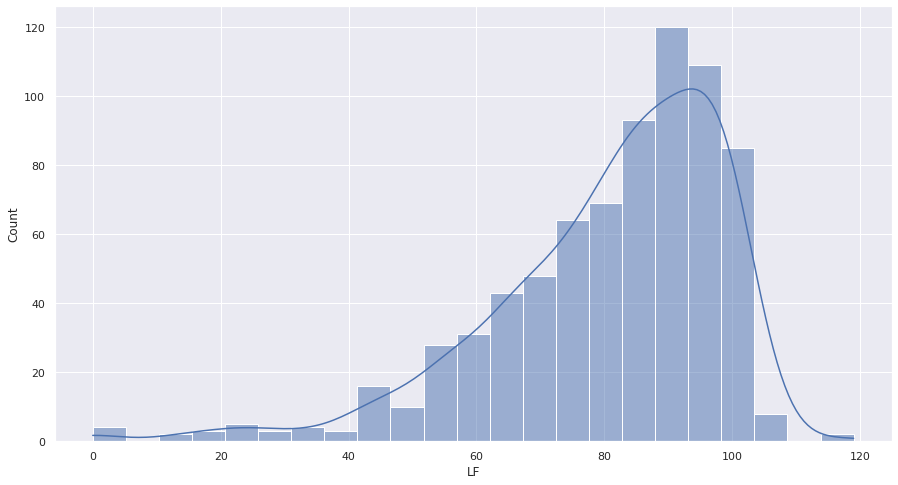

In [161]:
df['LF']
ax = sns.histplot(data= df3.LF, kde= True)

# Etudio tiempo desde que aterriza hasta que se abre la puerta cargo y PAX

In [162]:
df3=df.copy()

df3['retardoOperturaPuertaAterrizaje']=(df['Open Cargo/Pax Door']-df['ATA'])  /  np.timedelta64(1, 'm') 
df3[['retardoOperturaPuertaAterrizaje','Open Cargo/Pax Door', 'ATA']]

,retardoOperturaPuertaAterrizaje,Open Cargo/Pax Door,ATA
0,3.0,2022-01-01 09:23:00,2022-01-01 09:20:00
1,2.0,2022-01-01 11:11:00,2022-01-01 11:09:00
2,1.0,2022-01-01 12:46:00,2022-01-01 12:45:00
3,1.0,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0.0,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
56128,476.0,2022-05-16 15:33:00,2022-05-16 07:37:00
56129,479.0,2022-05-16 18:01:00,2022-05-16 10:02:00
56130,516.0,2022-05-16 20:31:00,2022-05-16 11:55:00
56131,-404.0,2022-05-16 09:34:00,2022-05-16 16:18:00


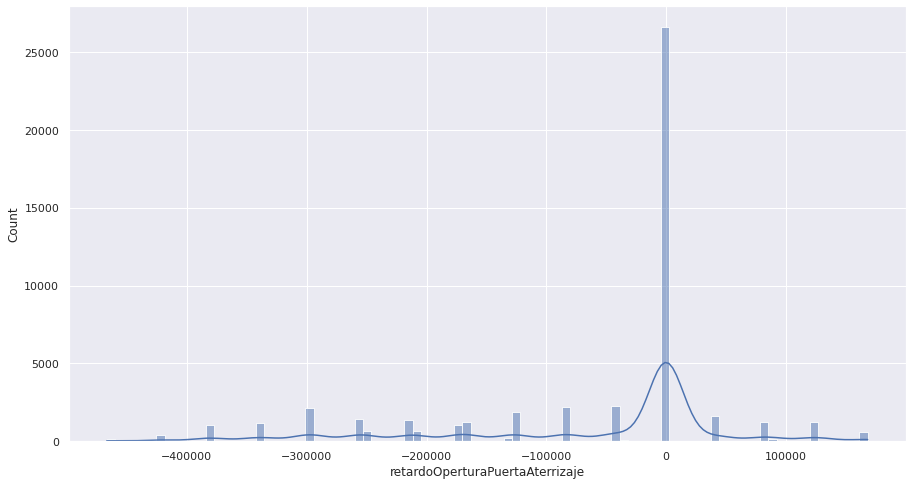

In [163]:
ax = sns.histplot(data= df3.retardoOperturaPuertaAterrizaje, kde= True)